In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('House_Rent_Dataset.csv')

In [3]:
df.head(3)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


In [5]:
df.shape

(4746, 12)

In [6]:
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

### Data Exploration

In [7]:
df.BHK.unique()

array([2, 1, 3, 6, 4, 5], dtype=int64)

In [8]:
df.Floor.unique()

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24', '3 out of 21',
       '1 out of 22', '8 out of 8', '6 out of 12', '4 out of 58',
       'Upper Basement o

In [9]:
df.Floor.value_counts()

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
17 out of 18         1
4 out of 24          1
6 out of 23          1
7 out of 28          1
11 out of 11         1
Name: Floor, Length: 480, dtype: int64

In [11]:
df['Area Type'].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

In [15]:
df['Area Type'].value_counts()

Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64

In [14]:
df['Area Locality'].unique()

array(['Bandel', 'Phool Bagan, Kankurgachi', 'Salt Lake City Sector 2',
       ..., 'BN Reddy Nagar', 'Godavari Homes, Quthbullapur',
       'Manikonda, Hyderabad'], dtype=object)

In [16]:
df['Area Locality'].value_counts()

Bandra West                        37
Gachibowli                         29
Electronic City                    24
Miyapur, NH 9                      22
Velachery                          22
                                   ..
Mokila                              1
Ananda Puram, Jeevan Bima Nagar     1
Talagatta Pura                      1
Utkarsh CHS, Prabhadevi             1
L&T Emerald Isle, Chandivali        1
Name: Area Locality, Length: 2235, dtype: int64

In [17]:
df['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [18]:
df['City'].value_counts()

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

In [19]:
df['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [20]:
df['Furnishing Status'].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

In [21]:
df['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [22]:
df['Tenant Preferred'].value_counts()

Bachelors/Family    3444
Bachelors            830
Family               472
Name: Tenant Preferred, dtype: int64

In [25]:
df['Point of Contact'].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

In [26]:
df['Point of Contact'].value_counts()

Contact Owner      3216
Contact Agent      1529
Contact Builder       1
Name: Point of Contact, dtype: int64

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 296.7+ KB


### Preprocessing the columns

In [21]:
column = df.columns.to_list()

In [22]:
colum = []
for i in column:
    i = i.replace(' ', '_')
    colum.append(i)

In [23]:
df.columns = colum

In [24]:
df.head(3)

,Posted_On,BHK,Rent,Size,Floor,Area_Type,Area_Locality,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


### Preprocessing the data

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
change = ['Area_Locality', 'Floor']

for changes in change:
    df[f"{changes}_cat"] = df[changes].astype('category')
    df[f"{changes}_cat"] = df[f"{changes}_cat"].cat.codes
        
df.drop(change, inplace=True, axis=1)

In [27]:
# this is a function that preprocesses the categorical variables
def process(data):
    
    # ==================================================
    le = LabelEncoder()
    
    data['Point_of_Contact'] = le.fit_transform(data['Point_of_Contact'])
    data['Tenant_Preferred'] = le.fit_transform(data['Tenant_Preferred'])
    data['Furnishing_Status'] = le.fit_transform(data['Furnishing_Status'])
    data['Area_Type'] = le.fit_transform(data['Area_Type'])
    data['City'] = le.fit_transform(data['City'])
    
    # converting 'Posted_On' to pandas standard time
    data.Posted_On = pd.to_datetime(data.Posted_On)
  
    
#     data.City = data.City.astype('category')
#     data.Area_Locality_cat = data.Area_Locality_cat.astype('category')
#     data.Floor_cat = data.Floor_cat.astype('category')
#     data.Furnishing_Status = data.Furnishing_Status.astype('category')
#     data.Point_of_Contact = data.Point_of_Contact.astype('category')
#     data.Tenant_Preferred = data.Tenant_Preferred.astype('category')
#     data.Area_Type = data.Area_Type.astype('category')



    
    # ==================================================
    
#     data = pd.get_dummies(data['City'], prefix_sep='_')
    
    # ==================================================
    
#     change = ['Area_Locality', 'Floor']
    
#     for changes in change:
#         data[f"{changes}_cat"] = data[changes].astype('category')
#         data[f"{changes}_cat"] = data[f"{changes}_cat"].cat.codes
        
#     data.drop(change, inplace=True, axis=1)
    return data
    


### Function for Feature Scaling

In [28]:
def Fs(data):
    
    data['Area_Locality_cat'] = data['Area_Locality_cat'].astype('float') 
    data['Floor_cat'] = data['Floor_cat'].astype('float') 


    nlist = ['Point_of_Contact', 'Tenant_Preferred', 
             'Furnishing_Status', 'Area_Type', 'City', 
             'Area_Locality_cat', 'Floor_cat', 'Size', 
             'BHK', 'Bathroom']

    data = data[nlist]/data[nlist].max()    
        
    return data

In [14]:
# this is a function that preprocesses the categorical variables
def cat(data):
  
    
    data.City = data.City.astype('category')
    data.Area_Locality_cat = data.Area_Locality_cat.astype('category')
    data.Floor_cat = data.Floor_cat.astype('category')
    data.Furnishing_Status = data.Furnishing_Status.astype('category')
    data.Point_of_Contact = data.Point_of_Contact.astype('category')
    data.Tenant_Preferred = data.Tenant_Preferred.astype('category')
    data.Area_Type = data.Area_Type.astype('category')



    
    # ==================================================
    
#     data = pd.get_dummies(data['City'], prefix_sep='_')
    
    # ==================================================
    
#     change = ['Area_Locality', 'Floor']
    
#     for changes in change:
#         data[f"{changes}_cat"] = data[changes].astype('category')
#         data[f"{changes}_cat"] = data[f"{changes}_cat"].cat.codes
        
#     data.drop(change, inplace=True, axis=1)
    return data
    


In [29]:
# The function - process() is called on this data for cleaning

df = process(df)

In [16]:
df.head(2)

,Posted_On,BHK,Rent,Size,Area_Type,City,Furnishing_Status,Tenant_Preferred,Bathroom,Point_of_Contact,Area_Locality_cat,Floor_cat
0,2022-05-18,2,10000,1100,2,4,2,1,2,2,221,455
1,2022-05-13,2,20000,800,2,4,1,1,1,2,1527,14


In [30]:
# Calling the function for feature scaling on df and storing it in df

ds = Fs(df)
# ds = cat(ds)
ds['Rent'] = df['Rent']


In [31]:
ds.head(2)

,Point_of_Contact,Tenant_Preferred,Furnishing_Status,Area_Type,City,Area_Locality_cat,Floor_cat,Size,BHK,Bathroom,Rent
0,1.0,0.5,1.0,1.0,0.8,0.098926,0.949896,0.1375,0.333333,0.2,10000
1,1.0,0.5,0.5,1.0,0.8,0.683527,0.029228,0.1000,0.333333,0.1,20000


In [32]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Point_of_Contact   4746 non-null   float64
 1   Tenant_Preferred   4746 non-null   float64
 2   Furnishing_Status  4746 non-null   float64
 3   Area_Type          4746 non-null   float64
 4   City               4746 non-null   float64
 5   Area_Locality_cat  4746 non-null   float64
 6   Floor_cat          4746 non-null   float64
 7   Size               4746 non-null   float64
 8   BHK                4746 non-null   float64
 9   Bathroom           4746 non-null   float64
 10  Rent               4746 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 407.9 KB


In [33]:
ds.corr()

,Point_of_Contact,Tenant_Preferred,Furnishing_Status,Area_Type,City,Area_Locality_cat,Floor_cat,Size,BHK,Bathroom,Rent
Point_of_Contact,1.000000,0.063182,0.131276,0.559451,-0.357165,0.000294,-0.025098,-0.214327,-0.230954,-0.327666,-0.339677
Tenant_Preferred,0.063182,1.000000,-0.092878,0.155388,0.041769,-0.030848,0.016247,0.031500,0.041534,0.056894,0.006027
Furnishing_Status,0.131276,-0.092878,1.000000,0.056276,0.002633,0.015144,-0.014131,-0.172783,-0.140264,-0.181425,-0.146251
Area_Type,0.559451,0.155388,0.056276,1.000000,-0.282856,-0.007743,-0.020014,-0.079705,-0.153225,-0.183012,-0.214867
City,-0.357165,0.041769,0.002633,-0.282856,1.000000,-0.042836,0.098340,-0.049831,0.046914,0.108257,0.210525
Area_Locality_cat,0.000294,-0.030848,0.015144,-0.007743,-0.042836,1.000000,-0.021142,-0.006800,0.016211,0.010241,-0.018849
Floor_cat,-0.025098,0.016247,-0.014131,-0.020014,0.098340,-0.021142,1.000000,0.007967,-0.005432,-0.003751,0.024250
Size,-0.214327,0.031500,-0.172783,-0.079705,-0.049831,-0.006800,0.007967,1.000000,0.716145,0.740703,0.413551
BHK,-0.230954,0.041534,-0.140264,-0.153225,0.046914,0.016211,-0.005432,0.716145,1.000000,0.794885,0.369718
Bathroom,-0.327666,0.056894,-0.181425,-0.183012,0.108257,0.010241,-0.003751,0.740703,0.794885,1.000000,0.441215


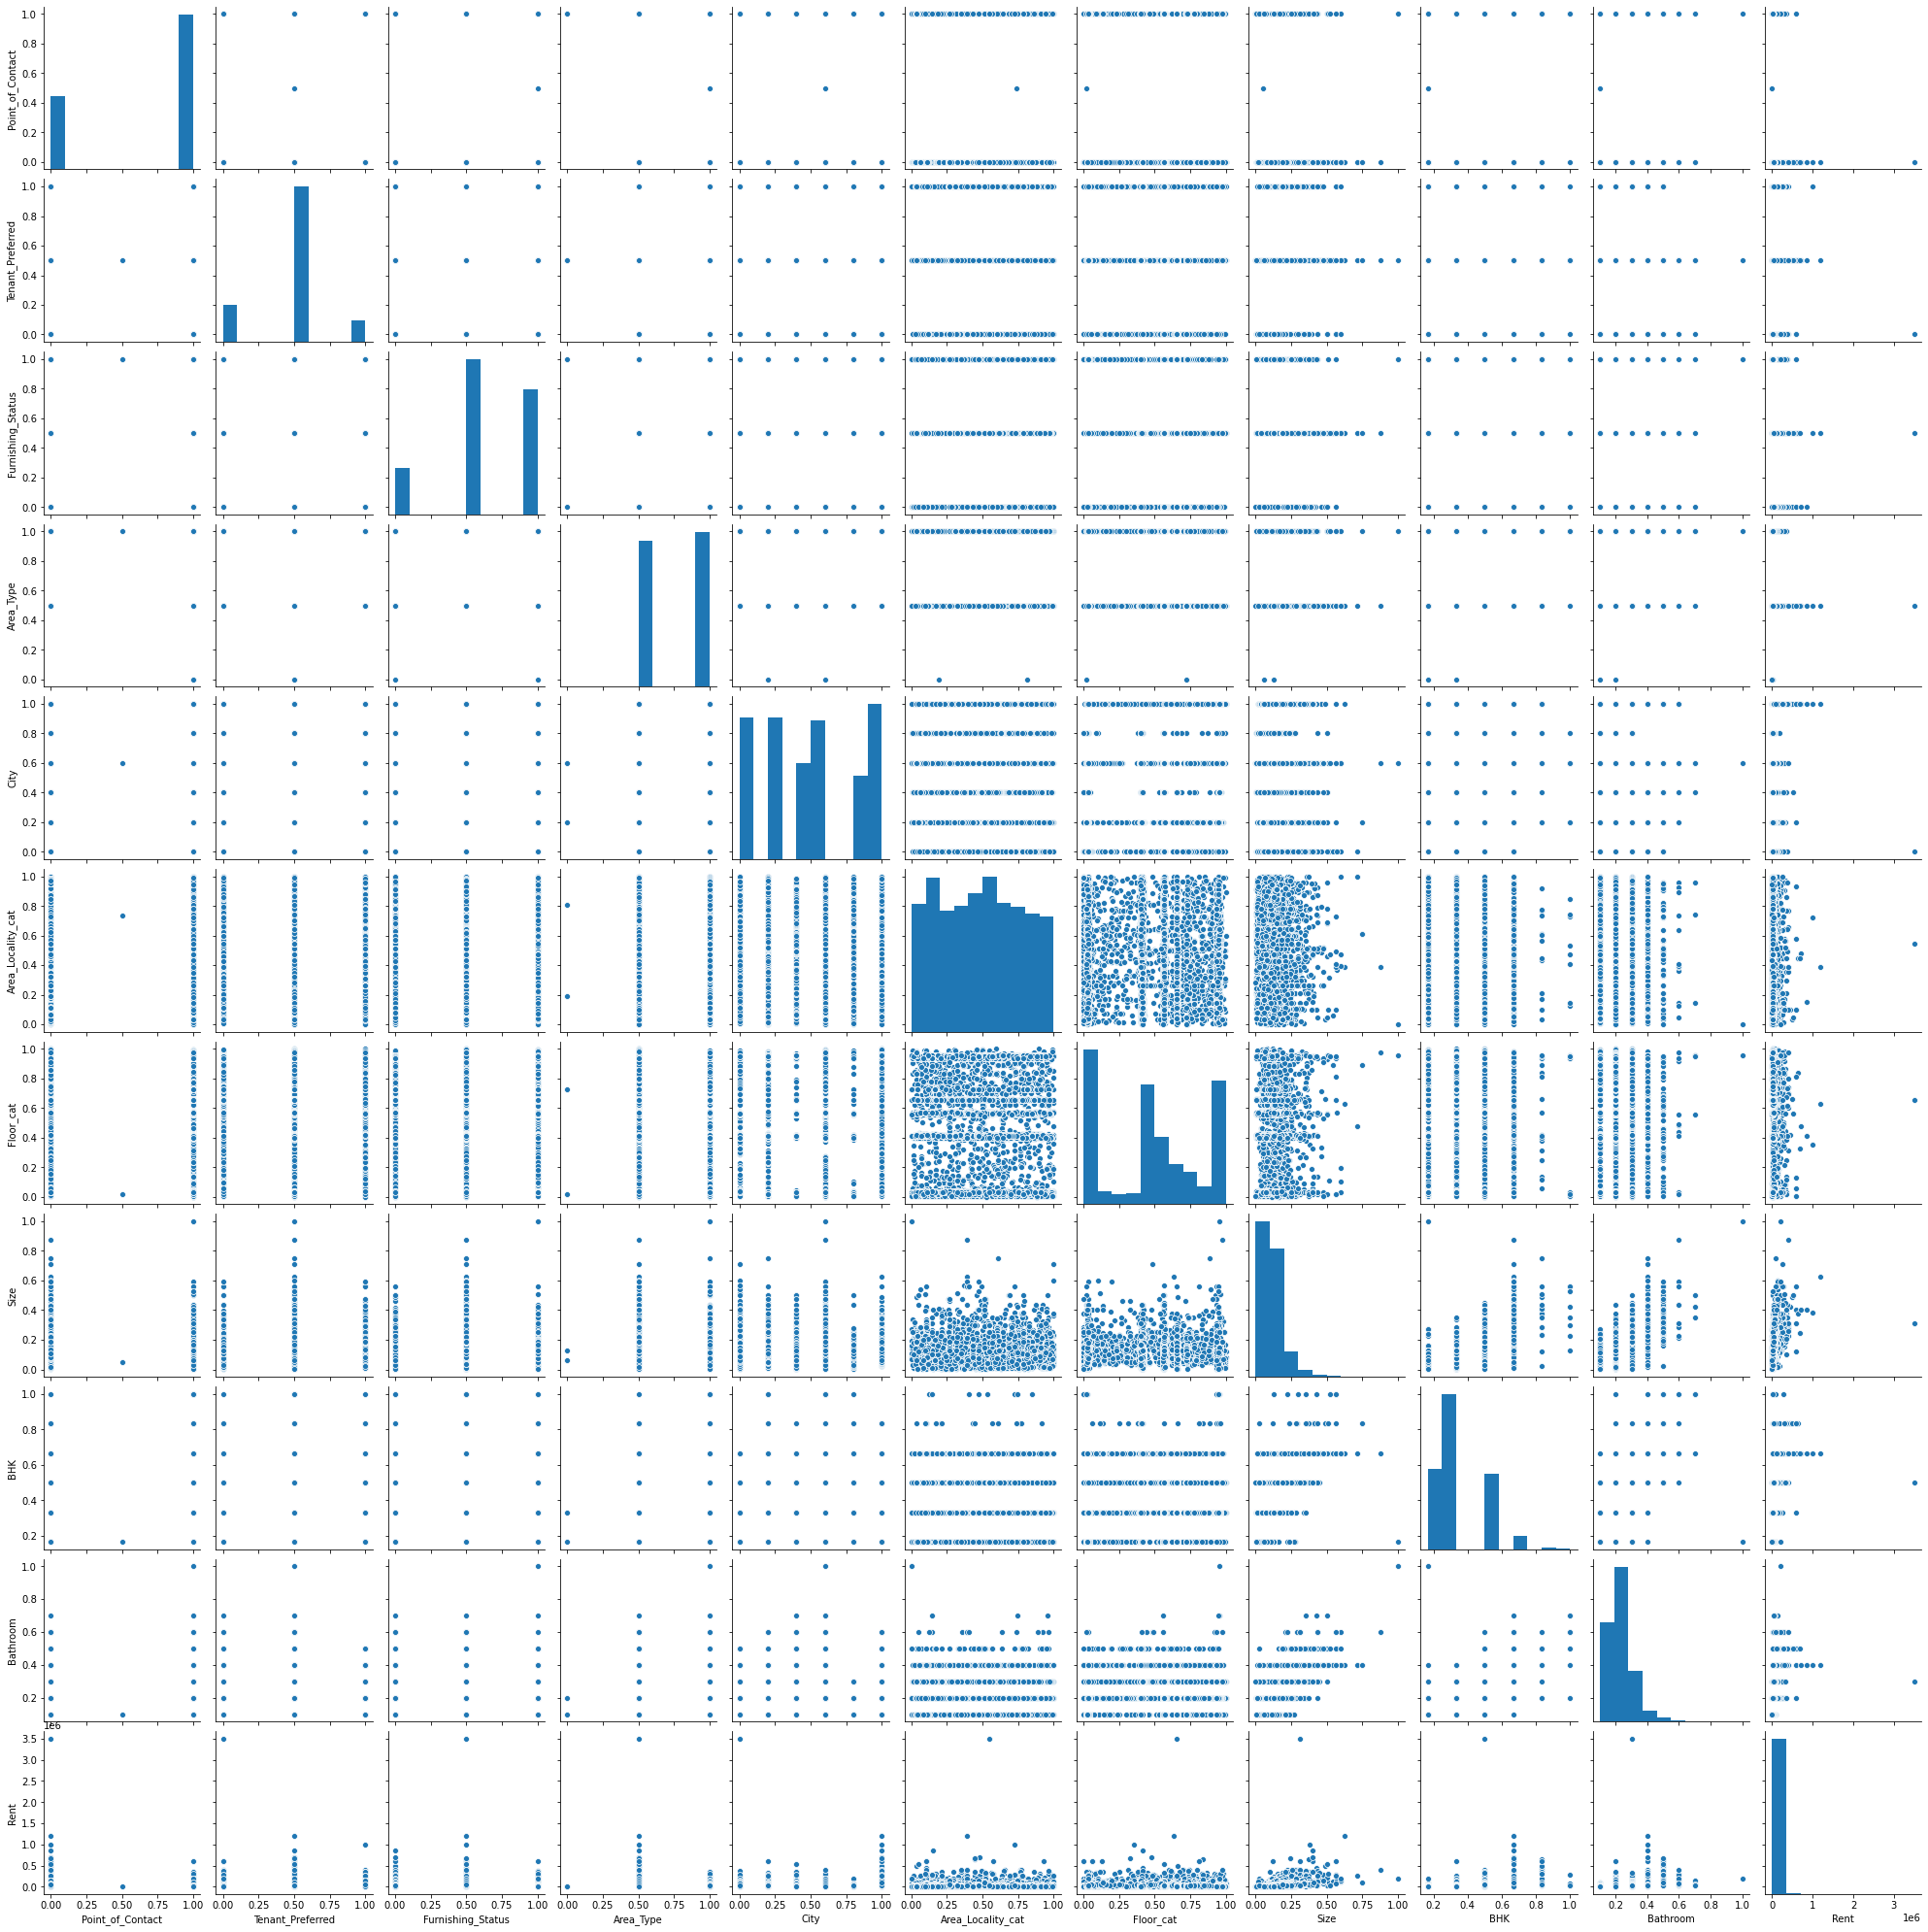

In [136]:
sns.pairplot(ds)

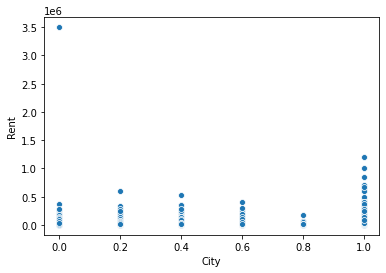

In [23]:
sns.scatterplot(x='City', y='Rent', data=ds)

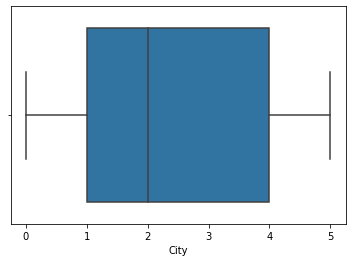

In [51]:
sns.boxplot('City', data=df)

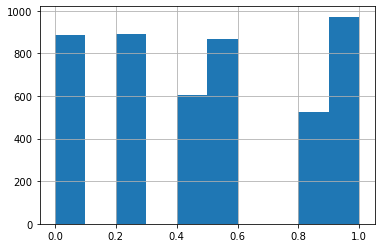

In [24]:
plt.hist('City', data=ds)
plt.grid()

#### Resetting the index of the DataFrame

In [34]:
df.set_index('Posted_On', inplace=True)

In [35]:
ds['Floor_cat'].value_counts()

0.020877    379
0.949896    350
0.409186    312
0.413361    308
0.029228    293
           ... 
0.379958      1
0.156576      1
0.688935      1
0.469729      1
0.402923      1
Name: Floor_cat, Length: 480, dtype: int64

In [36]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Point_of_Contact   4746 non-null   float64
 1   Tenant_Preferred   4746 non-null   float64
 2   Furnishing_Status  4746 non-null   float64
 3   Area_Type          4746 non-null   float64
 4   City               4746 non-null   float64
 5   Area_Locality_cat  4746 non-null   float64
 6   Floor_cat          4746 non-null   float64
 7   Size               4746 non-null   float64
 8   BHK                4746 non-null   float64
 9   Bathroom           4746 non-null   float64
 10  Rent               4746 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 407.9 KB


In [37]:
ds.describe()

,Point_of_Contact,Tenant_Preferred,Furnishing_Status,Area_Type,City,Area_Locality_cat,Floor_cat,Size,BHK,Bathroom,Rent
count,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4746.000000,4.746000e+03
mean,0.677729,0.462284,0.619574,0.757480,0.491403,0.488680,0.479377,0.120936,0.347310,0.196587,3.499345e+04
std,0.467339,0.259183,0.342276,0.250336,0.357438,0.283436,0.339871,0.079275,0.138709,0.088453,7.810641e+04
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001250,0.166667,0.100000,1.200000e+03
25%,0.000000,0.500000,0.500000,0.500000,0.200000,0.246643,0.054280,0.068750,0.333333,0.100000,1.000000e+04
50%,1.000000,0.500000,0.500000,1.000000,0.400000,0.489928,0.417537,0.106250,0.333333,0.200000,1.600000e+04
75%,1.000000,0.500000,1.000000,1.000000,0.800000,0.730081,0.774530,0.150000,0.500000,0.200000,3.300000e+04
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.500000e+06


### Checking the correlation of the price with time

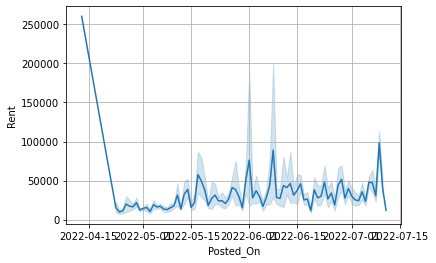

In [32]:
sns.lineplot('Posted_On', 'Rent', data=df)
plt.grid()

##### It can be deduce from the graph that the rent is not affected by time since no regular pattern can be observed in the graph

### Checking the correation of each column with the target column

In [39]:
ds.corr()

,Point_of_Contact,Tenant_Preferred,Furnishing_Status,Area_Type,City,Area_Locality_cat,Floor_cat,Size,BHK,Bathroom,Rent
Point_of_Contact,1.000000,0.063626,0.130200,0.559100,-0.357878,0.000959,-0.024424,-0.213095,-0.227197,-0.328810,-0.453645
Tenant_Preferred,0.063626,1.000000,-0.092919,0.155778,0.040670,-0.031139,0.016489,0.030916,0.040803,0.056457,0.023511
Furnishing_Status,0.130200,-0.092919,1.000000,0.055427,0.003080,0.015302,-0.014312,-0.179165,-0.138750,-0.184239,-0.198585
Area_Type,0.559100,0.155778,0.055427,1.000000,-0.282920,-0.007290,-0.020176,-0.080053,-0.151738,-0.184828,-0.284538
City,-0.357878,0.040670,0.003080,-0.282920,1.000000,-0.041915,0.098720,-0.053245,0.046624,0.108343,0.308596
Area_Locality_cat,0.000959,-0.031139,0.015302,-0.007290,-0.041915,1.000000,-0.020638,-0.005145,0.015110,0.013304,-0.027842
Floor_cat,-0.024424,0.016489,-0.014312,-0.020176,0.098720,-0.020638,1.000000,-0.000729,-0.006737,-0.008614,0.024983
Size,-0.213095,0.030916,-0.179165,-0.080053,-0.053245,-0.005145,-0.000729,1.000000,0.732945,0.737611,0.506844
BHK,-0.227197,0.040803,-0.138750,-0.151738,0.046624,0.015110,-0.006737,0.732945,1.000000,0.803397,0.491471
Bathroom,-0.328810,0.056457,-0.184239,-0.184828,0.108343,0.013304,-0.008614,0.737611,0.803397,1.000000,0.590622


In [213]:
ds.head(2)

,Point_of_Contact,Tenant_Preferred,Furnishing_Status,Area_Type,City,Area_Locality_cat,Floor_cat,Size,BHK,Bathroom,Rent
0,1.0,0.5,1.0,1.0,0.8,0.098926,0.949896,0.1375,0.333333,0.2,10000
1,1.0,0.5,0.5,1.0,0.8,0.683527,0.029228,0.1000,0.333333,0.1,20000


### Checking the outliers with boxplot
- for 'Rent' drop values that are greater than 1500000
- for 'Size' drop values that are greater than .6
- for 'Bathroom' drop values that are greater than .8

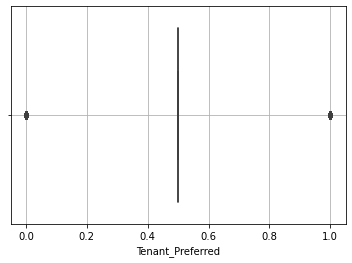

In [161]:
sns.boxplot('Tenant_Preferred', data=ds)
plt.grid()

### Dropping Coloums  with outliers

In [38]:
## 'Size' > .6
ds.drop(ds[ds['Size'] >.6].index.to_list(), inplace=True)

## "Rent" > 
ds.drop(ds[ds['Rent'] >800000].index.to_list(), inplace=True)

## for 'Bathroom' > 0.8
ds.drop(ds[ds['Bathroom'] >.8].index.to_list(), inplace=True)

# ds.drop('Tenant_Preferred', axis=1, inplace=True)

In [166]:
ds.head(2)

,Point_of_Contact,Furnishing_Status,Area_Type,City,Area_Locality_cat,Floor_cat,Size,BHK,Bathroom,Rent
Posted_On,,,,,,,,,,
2022-05-13,1.0,0.5,1.0,0.8,0.683527,0.029228,0.100,0.333333,0.1,20000
2022-05-16,1.0,0.5,1.0,0.8,0.787825,0.029228,0.125,0.333333,0.1,17000


In [167]:
ds[ds['Rent'] >800000]

,Point_of_Contact,Furnishing_Status,Area_Type,City,Area_Locality_cat,Floor_cat,Size,BHK,Bathroom,Rent
Posted_On,,,,,,,,,,


#### Dividing the data into x and y

In [42]:
y = ds.Rent
x = ds.drop('Rent', axis=1)

In [45]:
x.head(2)

,Point_of_Contact,Tenant_Preferred,Furnishing_Status,Area_Type,City,Area_Locality_cat,Floor_cat,Size,BHK,Bathroom
0,1.0,0.5,1.0,1.0,0.8,0.098926,0.949896,0.1375,0.333333,0.2
1,1.0,0.5,0.5,1.0,0.8,0.683527,0.029228,0.1000,0.333333,0.1


#### Splitting the data into train and test

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [48]:
y_test.head(2)

2317    14000
354      6500
Name: Rent, dtype: int64

In [49]:
x_test.head(2)

,Point_of_Contact,Tenant_Preferred,Furnishing_Status,Area_Type,City,Area_Locality_cat,Floor_cat,Size,BHK,Bathroom
2317,0.0,0.5,0.5,0.5,0.0,0.583259,0.417537,0.05500,0.166667,0.1
354,1.0,1.0,1.0,1.0,0.8,0.089526,0.563674,0.05625,0.166667,0.1


## Model

In [50]:
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV

from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor,
                              ExtraTreesRegressor, GradientBoostingRegressor, 
                              RandomForestRegressor)

from xgboost import XGBRegressor

from sklearn.metrics import r2_score, f1_score

### Function for cross_val_scores_validation_score

In [144]:
def cross_val(model, x, y):
    score = cross_val_score(model, x, y, cv=40)
#     print(score)
    mean_score = np.mean(score)
    
    return mean_score

In [142]:
model = [GradientBoostingRegressor(n_estimators=50, learning_rate=.25,
                                      max_depth=6, max_features=.7, random_state=42),
         LinearRegression(normalize=True, n_jobs=100),
         AdaBoostRegressor(n_estimators=100, learning_rate=.5, random_state=42),
         ExtraTreesRegressor(n_estimators=100, max_depth=50,random_state=42),
         RandomForestRegressor(n_estimators=50, min_samples_split=10, min_samples_leaf=10,  max_depth=30, random_state=42)
        ]

In [143]:
testing = []
for models in range(len(model)):
    print(model[models])
    score = cross_val(model[models], x_train, y_train)
    testing.append(score)

GradientBoostingRegressor(learning_rate=0.25, max_depth=6, max_features=0.7,
                          n_estimators=50, random_state=42)
[0.62484954 0.52319073 0.13665803 0.70308096 0.69846315 0.91520209
 0.74921161 0.90721865 0.83277182 0.45096668 0.7939166  0.6549212
 0.80658584 0.65042437 0.48158715 0.94324227 0.73978912 0.87163993
 0.72824713 0.84825004 0.68979921 0.77504587 0.60384398 0.6936836
 0.88942317 0.68929075 0.66241237 0.5737571  0.59636237 0.58440542
 0.9156761  0.49986771 0.77210997 0.45145628 0.56594502 0.57809609
 0.59343486 0.40388013 0.67793625 0.84509127]
LinearRegression(n_jobs=100, normalize=True)
[-0.20613588  0.42704112  0.55295573  0.43435424  0.22794199  0.52367006
  0.60924756  0.46359603  0.43581494  0.33423808  0.37207134  0.51695883
  0.54488985  0.42063352  0.40992495  0.54476289  0.46129635  0.41864031
  0.62266159  0.44182706  0.64485123  0.61398298  0.20572279  0.38358614
  0.60073343  0.57355693  0.42533471  0.59655866  0.4520917   0.27392589
  0.587

### getting the best model and storing it in Bm

In [150]:
index_of_max_tester = np.argmax(testing)
Bm = model[index_of_max_tester]
Bm

RandomForestRegressor(max_depth=30, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=50, random_state=42)

In [162]:
perf = []
prediction = []
for i in range(500):
    model = RandomForestRegressor(max_depth=50, min_samples_leaf=10, min_samples_split=10,
                      n_estimators=50, random_state=i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    prediction.append(y_pred)
    score = r2_score(y_test, y_pred)
    perf.append(score)

In [163]:

max_n = np.argmax(perf)
print(max_n)
print(perf[max_n])


334
0.7444614532130367


In [164]:
prediction[max_n]

array([13621.51105974,  5940.73201005, 28250.16439585, ...,
       12775.88515917, 27337.31195723, 11642.92684657])

In [159]:
y_test

2317    14000
354      6500
1400    30000
1717    20000
3941    25000
        ...  
3126     8000
108      8000
3448    15000
3567    24000
58       7000
Name: Rent, Length: 1422, dtype: int64

### Using Xgboost and GridSearchCV

In [165]:
perf = []
for i in range(500):
    model = GradientBoostingRegressor(n_estimators=50, learning_rate=1,
                                      max_depth=6, max_features=.7, random_state=i)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = r2_score(y_test, y_pred)
    perf.append(score)

In [166]:
print(np.mean(perf))

max_n = np.argmax(perf)
print(max_n)
print(perf[max_n])

print(np.min(perf))

0.5101456146942854
230
0.6498740174572719
0.2769292789936951
